# ML using Python : Dimensionality Reduction 

### What is Dimensionality?

Dimensionality in statistics refers to how many attributes a dataset has. For example, healthcare data is notorious for having vast amounts of variables (e.g. blood pressure, weight, cholesterol level). In an ideal world, this data could be represented in a spreadsheet, with one column representing each dimension. In practice, this is difficult to do, in part because many variables are inter-related (like weight and blood pressure). 

## High Dimensional Data

High Dimensional means that the number of dimensions are staggeringly high — so high that calculations become extremely difficult. With high dimensional data, the number of features can exceed the number of observations.

## High Dimension Definition as per the 'Purist'

Let’s say we have n samples (a.k.a. data points, instances) and p features (a.k.a. attributes, independent variables, explanatory variables). So many people are holding the imprecise opinion that high dimensional data is simply a data set with a very large p.

Then, please tell me whether p=1000 means high dimensional data. In modern machine, 1000 features is not a big deal, but I believe it sounds pretty high dimension to many people.
In fact, “high dimension” has a very rigorous meaning: it means a data set whenever p>n, no matter what p is or n is. Because in statistics, you will never have deterministic answer when p>n unless you introduce your own assumption.

For example, if you have 3 data points, and 5 features each, it’s a high dimensional data. On the other hand, even if you have 500k features, once you have 1M samples, it’s still low dimensional.

## Curse of Dimensionality

The curse of dimensionality usually refers to what happens when you add more and more variables to a multivariate model. The more dimensions you add to a data set, the more difficult it becomes to predict certain quantities. You would think that more is better. However, when it comes to adding variables, the opposite is true. Each added variable results in an exponential decrease in predictive power. 

As a simple example, let’s say you are using a model to predict the location of a large bacteria in a 25cm2 petri dish. The model might be fairly accurate at pinning the particle down to the nearest square cm. However, let’s say you add just one more dimension: Instead of a 2D petri dish you use a 3D beaker . The predictive space increases exponentially, from 25 cm2 to 125 cm3. When you add more dimensions, it makes sense that the computational burden also increases. It wouldn’t be impossible to pinpoint where bacteria might be in a 3D model. However, it’s a more challenging task.

### Key Challenges / De-Merits of High Dimensionality in Machine Learning 

1) Impossible or not feasible to analyze each and every variable at a microscopic level. It might take us days or months to perform any meaningful analysis and we’ll lose a ton of time and money for our business.

2) High dimensional data will take lots of 'Computational Power' 

3) Due to interdependency of features the 'Net Quality' of Prediction will degrade 

## What is the solution for 'Curse of High Dimensionality'

<b> Dimensionality Reduction Technique </b>

We can use this concept to reduce the number of features in your dataset without having to lose much information and keep (or improve) the model’s performance. 

It’s a really powerful way to deal with huge datasets.

### Benefits of applying dimensionality reduction to a dataset:

1) Space required to store the data is reduced as the number of dimensions comes down

2) Less dimensions lead to less computation/training time

3) Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful

4) It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require

5) It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

### Common Dimensionality Reduction Techniques

Dimensionality reduction can be done in two different ways:

A) By only keeping the most relevant variables from the original dataset (this technique is called feature selection)

B) By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

### Technique 1 : Dropping Features based on 'Missing Value Ratio'

What if we have too many missing values (say more than 50%) for a Feature ? 

Should we impute the missing values or drop the variable? 

We would prefer to drop the variable since it will not have much information. 

However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

<u>Let's Implement the same in Python</u>

In [18]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# read the data

Big_Mart_DF = pd.read_csv("Train_Big_Mart.csv")

In [20]:
Big_Mart_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [21]:
Big_Mart_DF.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
# checking the percentage of missing values in each variable

Big_Mart_DF.isnull().sum()/len(Big_Mart_DF) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [23]:
# saving missing values in a variable
Null_Percent = Big_Mart_DF.isnull().sum()/len(Big_Mart_DF)*100

Null_Percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [24]:
# saving column names in a variable
All_Variables = Big_Mart_DF.columns

All_Variables

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Let's say we can set a threshold of, say 20%, and remove the variable having more than 20% missing values.

In [25]:
# Initialize an empty variable 
Select_Variable = [ ]

for i in range(0,12):
    if Null_Percent[i]<=20:   #setting the threshold as 20%
        Select_Variable.append(All_Variables[i])

In [26]:
Select_Variable

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [27]:
Big_Mart_DF_Reduced = Big_Mart_DF[Select_Variable]

In [28]:
Big_Mart_DF_Reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [29]:
Big_Mart_DF_Reduced.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


### Bonus Learning Element : Imputation 

Imputation is the process of substituting / replacing the missing values with most probable values.

Let’s impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. 

For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values.

In [30]:
Big_Mart_DF['Item_Weight'].median()

12.6

In [31]:
Big_Mart_DF['Item_Weight'].fillna(Big_Mart_DF['Item_Weight'].median(), inplace=True)

Big_Mart_DF['Outlet_Size'].fillna(Big_Mart_DF['Outlet_Size'].mode()[0], inplace=True)

In [32]:
Big_Mart_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [33]:
Big_Mart_DF.isnull().sum()/len(Big_Mart_DF) * 100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

### Technique 2 : Dropping Features based on 'Low Variance'

Consider a variable in our dataset where all the observations have the same value, say 1. 

If we use this variable, do we think it will have any influence on the prediction of Target / Response Variable ? The answer is no. 

As this variable will have <b>zero variance</b>.

So, we need to calculate the variance of each variable we are given. 

Then drop the variables having low variance as compared to other variables in our dataset. 

The reason for doing this, as we mentioned above, is that variables with a low variance will not affect the target variable.

In [34]:
# let’s calculate the variance of all the numerical variables

Big_Mart_DF.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [35]:
# Drop the column with very low Variance 

Big_Mart_DF_drp = Big_Mart_DF.drop('Item_Visibility' , axis=1)

Big_Mart_DF_drp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.5+ KB


### Technique 3 : Dropping Features based on 'High Correlation between Predictor Variables'

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).


<b>As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.</b>

In [36]:
Big_Mart_DF.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


Wonderful, we don’t have any variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

### Technique 4 : Dropping Features based on 'Variable Importance'

Random Forest is one of the most widely used algorithms for <b>feature selection</b>. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.

In [37]:
from sklearn.ensemble import RandomForestRegressor

Pred_DF = Big_Mart_DF.drop(['Item_Outlet_Sales'],axis=1)

Pred_DF = pd.get_dummies(Pred_DF)

model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(Pred_DF,
          Big_Mart_DF.Item_Outlet_Sales)

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
Pred_DF.shape

(8523, 1604)

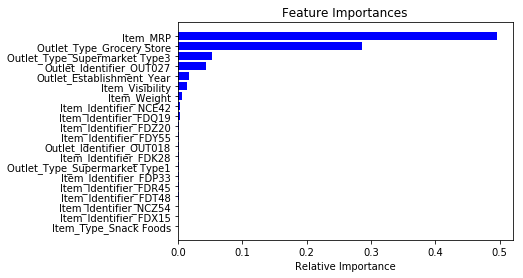

In [39]:
features = Pred_DF.columns

importances = model.feature_importances_

indices = np.argsort(importances)[-20:,]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. 

Alernatively, we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.

In [40]:
from sklearn.feature_selection import SelectFromModel

IMP_feature = SelectFromModel(model)

Fit_Data = IMP_feature.fit_transform(Pred_DF,Big_Mart_DF.Item_Outlet_Sales)

In [41]:
print(Pred_DF.shape)

print(Fit_Data.shape)

(8523, 1604)
(8523, 34)


### Technique 5 : Dimesnionality Reduction using 'Factor Analysis'

Factor analysis is a method for investigating whether a number of variables of interest X1, X2,……., Xn, are linearly related to a smaller number of unobservable factors F1, F2,..……, Fm.

Where m < n .

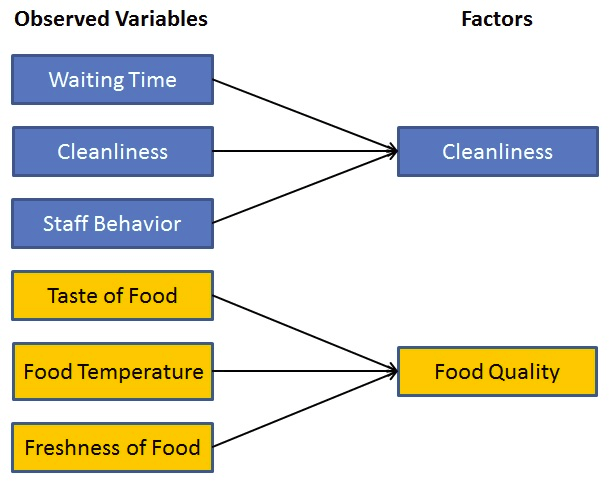

Assignment : Read more about Factor Analysis and have the same implemented in Python.

<b>Factor</b> analysis is a dimensionality reduction technique commonly used in statistics. 

FA is similar to principal component analysis. The difference are highly technical but include the fact the FA does not have an orthogonal decomposition and FA assumes that there are latent variables and that are influencing the observed variables in the model. 

For FA the goal is the explanation of the covariance among the observed variables present.

<b>What is Covariance </b>

In probability theory and statistics, covariance is the measure of how much two random variables vary together (as distinct from variance, which measures how much a single variable varies).

If two variables tend to vary together (that is, when one of them is above its expected value, then the other variable tends to be above its expected value too), then the covariance between the two variables will be positive. On the other hand, if one of them is above its expected value and the other variable tends to be below its expected value, then the covariance between the two variables will be negative.

Factor analysis can only be used to reduce continuous variables of the dataset. Therefore, we will be removing categorical variables. Again, like principal component analysis, this is also an unsupervised learning algorithm and hence we will be removing the dependent variable from our dataset.

A good way to show how to use factor analysis is to start with the Iris dataset.

In [42]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis


In [43]:
iris = load_iris()
X, y = iris.data, iris.target


In [44]:
X.shape

(150, 4)

In [45]:
factor_analysis = FactorAnalysis(n_components=2, random_state=101)

factor_analysis.fit(X)

X_FCA = factor_analysis.transform(X)

In [46]:
X_FCA.shape

(150, 2)

In [47]:
import pandas as pd

In [48]:
Iric_FCA_DF = pd.DataFrame(X_FCA , columns=['FCA_1','FCA_2'])

Iric_FCA_DF['Y'] = y

In [49]:
Iric_FCA_DF.head()

,FCA_1,FCA_2,Y
0,-1.327617,-0.561311,0
1,-1.337639,-0.002798,0
2,-1.402815,0.306349,0
3,-1.301043,0.718827,0
4,-1.333424,-0.364589,0


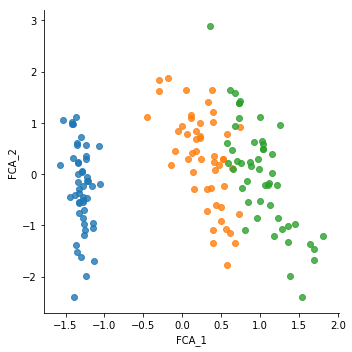

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lmplot(x="FCA_1", y="FCA_2", data= Iric_FCA_DF ,hue="Y", fit_reg=False, legend=False)

plt.show()

### Technique 6 : Dimesnionality Reduction using 'Principal Component Analysis'



### What is Principal Component Analysis (PCA) ?

In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.

It is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.



Let’s understand it using an example:

Let’s say we have a data set of dimension 300 (n) × 50 (p). n represents the number of observations and p represents number of predictors. Since we have a large p = 50, there can be p(p-1)/2 scatter plots i.e more than 1000 plots possible to analyze the variable relationship. It would be a tedious job to perform exploratory analysis on this data .

In this case, it would be a lucid approach to select a subset of p (p << 50) predictor which captures as much information. Followed by plotting the observation in the resultant low dimensional space.

### What are principal components ?

A principal component is a normalized linear combination of the original predictors in a data set. 

The principal component can be written as:

    Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp


where,

Z¹ is first principal component


Therefore,

<b>First principal component</b> is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component. No other component can have variability higher than first principal component.

<b>Second principal component </b> (Z²) is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. In other words, the correlation between first and second component should is zero.

All succeeding principal component follows a similar concept i.e. they capture the remaining variation without being correlated with the previous component.

### Normalization of variables necessary

The principal components are supplied with normalized version of original predictors. This is because, the original predictors may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

#### Implementing PCA in Python

In [51]:
# Import required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.preprocessing import scale

In [69]:
Pred_DF.shape

(8523, 1604)

In [70]:
#convert it to numpy arrays

X=Pred_DF.values

In [71]:
X.shape

(8523, 1604)

In [72]:
pca_model = PCA(n_components=44)

pca_model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=44, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
#The amount of variance that each PC explains
var= pca_model.explained_variance_ratio_

var

array([9.76580255e-01, 1.77296939e-02, 4.49707256e-03, 1.87033448e-04,
       1.13598392e-04, 1.06031078e-04, 8.63068031e-05, 7.21626653e-05,
       4.80051763e-05, 3.60389389e-05, 3.13452989e-05, 2.88606199e-05,
       2.74028950e-05, 2.49408905e-05, 2.42562405e-05, 2.29108583e-05,
       1.97867490e-05, 1.92757583e-05, 1.60005788e-05, 1.46136836e-05,
       1.40597204e-05, 1.22822069e-05, 8.25488821e-06, 6.69119085e-06,
       5.44603836e-06, 5.00422227e-06, 4.64446852e-06, 3.55012363e-06,
       3.34592044e-06, 2.18409670e-06, 7.59220455e-07, 2.76531616e-07,
       2.61678108e-07, 2.56102700e-07, 2.54392473e-07, 2.53381460e-07,
       2.52482447e-07, 2.51332563e-07, 2.49722122e-07, 2.47798242e-07,
       2.45962586e-07, 2.44125521e-07, 2.43118077e-07, 2.40131488e-07])

In [57]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=4)*100)

var1

array([97.66, 99.43, 99.88, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94])

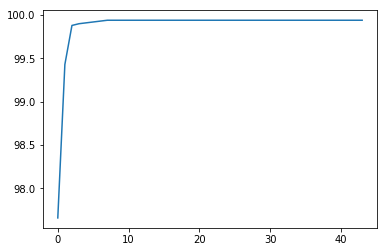

In [58]:
plt.plot(var1)

In [74]:
#Looking at above plot we can take 8 variables
pca = PCA(n_components=8)
#pca.fit(X)

X1=pca.fit_transform(X)

print(X1.shape)
print(X1)

(8523, 8)
[[ 1.08811093e+02 -1.08004673e+00 -3.69976993e+00 ...  2.96293100e-01
  -8.46674340e-01  9.69631274e-01]
 [-9.27276323e+01 -1.11900535e+01 -6.79800914e+00 ...  7.48416838e-01
   5.85557549e-01  1.37661449e-01]
 [ 6.33857879e-01 -1.19702478e+00  4.68179234e+00 ...  2.93552765e-01
  -8.59824152e-01  9.34835827e-01]
 ...
 [-5.58698362e+01 -6.21576499e+00 -2.14774897e+00 ... -1.85857171e-01
   5.78565748e-01 -7.81211112e-01]
 [-3.78612164e+01 -1.11583571e+01 -5.59819029e+00 ...  7.42999520e-01
   5.67609878e-01  1.29270723e-01]
 [-6.55229046e+01  7.91704786e-01  2.10276650e+00 ...  7.97462251e-01
   8.94528435e-02  2.20448475e-01]]


### Points to Remember for PCA 

1) PCA is used to overcome features redundancy in a data set.

2) These features are low dimensional in nature.

3) These features a.k.a components are a resultant of normalized linear combination of original predictor variables.

4) These components aim to capture as much information as possible with high explained variance.

5) The first component has the highest variance followed by second, third and so on.

6) The components must be uncorrelated .

7) Normalizing data becomes extremely important when the predictors are measured in different units.

8) PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

9) PCA is applied on a data set with numeric variables.

10) PCA is a tool which helps to produce better visualizations of high dimensional data.

### Technique 7 : Linear Discriminant Analysis ( LDA ) :


Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

So, in a nutshell, often the goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace k (where k≤n−1) while maintaining the class-discriminatory information. 

In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation (“curse of dimensionality”).

#### Load Data 

In [75]:
import pandas as pd
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

Iris_dataset = pd.read_csv(url, names=names)

In [76]:
Iris_dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.

In [77]:
from sklearn.preprocessing import LabelEncoder

X = Iris_dataset.iloc[:,:4].values
y = Iris_dataset['class'].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = y + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

#### LDA via scikit-learn

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [79]:
X_lda_sklearn.shape

(150, 2)

In [80]:
LDA_Iris_DF = pd.DataFrame(X_lda_sklearn , columns=['X1' , 'X2'])

In [81]:
LDA_Iris_DF['Y'] = y

In [82]:
LDA_Iris_DF.head()

,X1,X2,Y
0,-8.084953,0.328454,1
1,-7.147163,-0.755473,1
2,-7.511378,-0.238078,1
3,-6.837676,-0.642885,1
4,-8.157814,0.540639,1


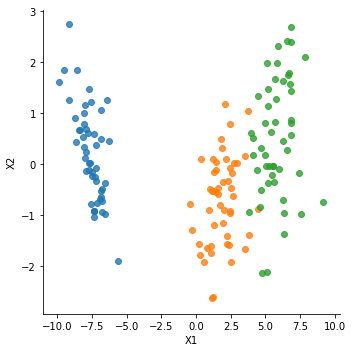

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.scatter(X_lda_sklearn[:,0], X_lda_sklearn[:,1])

sns.lmplot(x="X1", y="X2", data= LDA_Iris_DF ,hue="Y", fit_reg=False, legend=False)